In [91]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
dataframe = pd.read_csv("zomato_data.csv")
print(dataframe.info(),dataframe.describe())
print(dataframe.sort_values('votes', ascending = False).head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None              votes  approx_cost(for two people)
count   148.000000                   148.000000
mean    264.810811                   418.243243
std     653.676951                   223.085098
min       0.000000                   100.000000
25%       6.750000                   200.000000
50%      43.500000                   400

In [175]:
dataframe['rate'] = dataframe['rate'].str[:3].astype(float)

print(dataframe['rate'])

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


In [65]:
'''
The example makes a definition but this can all be easily handled by slicing the string then casting the resulting 
decimal value into a float using pandas' existing functionality
'''

"\nThe example makes a definition but this can all be easily handled by slicing the string then casting the resulting \ndecimal value into a float using pandas' existing functionality\n"

Text(0.5, 0, 'Type of restaurant')

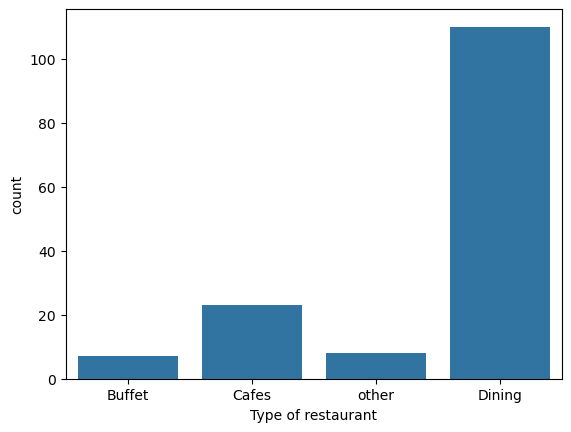

In [107]:
sns.countplot(x=dataframe['listed_in(type)'])
'''
this is actually neat since you don't have to do the extra steps of creating a separate dataframe of the types, etc
'''
plt.xlabel("Type of restaurant")

In [177]:
dataframe['rate']

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [181]:
collapsed = dataframe.groupby('listed_in(type)').agg(
    restaurant_count=('listed_in(type)', 'count'),
    voted=('votes', 'sum'),
    avg_rating=('rate','mean')).reset_index()
collapsed.rename(columns={'listed_in(type)': 'type'}, inplace=True)
print(collapsed)

     type  restaurant_count  voted  avg_rating
0  Buffet                 7   3028    3.842857
1   Cafes                23   6434    3.765217
2  Dining               110  20363    3.571818
3   other                 8   9367    3.912500


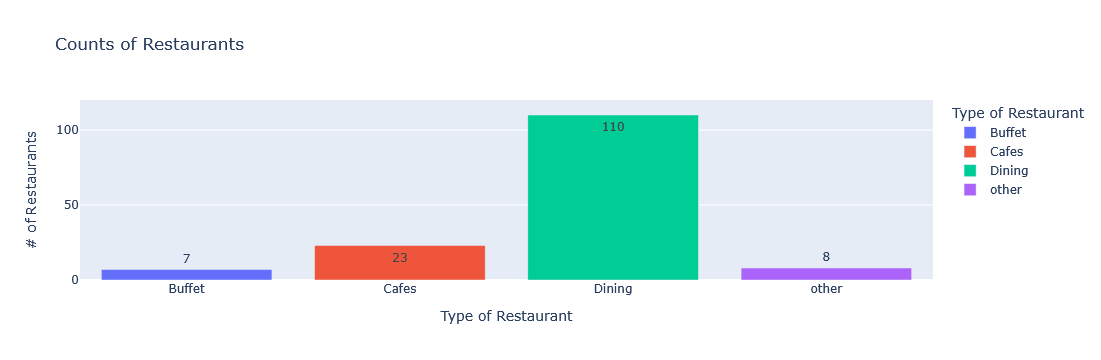

In [153]:
fig = px.bar(collapsed, x='type', y='restaurant_count', color = 'type', title = "Counts of Restaurants", text_auto = True,
             labels = {"type": "Type of Restaurant", "restaurant_count": "# of Restaurants"},
            range_y=[0,120])
fig.show()

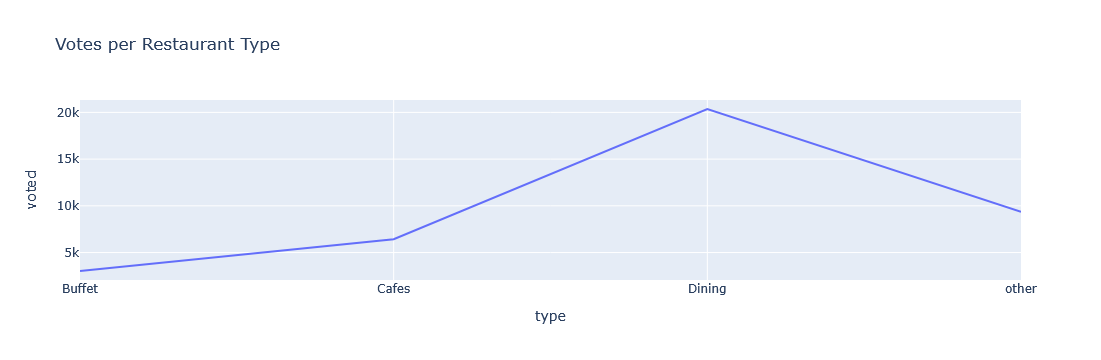

In [155]:
fig = px.line(collapsed, x="type", y="voted", title="Votes per Restaurant Type")
fig.show()

Text(0, 0.5, 'Votes')

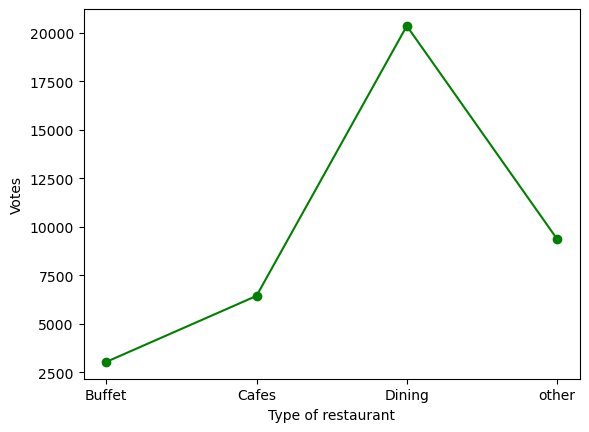

In [127]:

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [207]:
dataframe.rename(columns={'listed_in(type)': 'type'}, inplace=True)
top_5 = dataframe.sort_values(by='votes', ascending = False).drop_duplicates(subset=['name'],keep='first').head()
print(top_5)

                 name online_order book_table   rate  votes  \
38  Empire Restaurant          Yes         No  4.4/5   4884   
86      Meghana Foods          Yes         No  4.4/5   4401   
7              Onesta          Yes        Yes  4.6/5   2556   
65        Kabab Magic          Yes         No  4.1/5   1720   
37    Szechuan Dragon          Yes         No  4.2/5   1647   

    approx_cost(for two people)    type  
38                          750   other  
86                          600  Dining  
7                           600   Cafes  
65                          400  Dining  
37                          600  Dining  


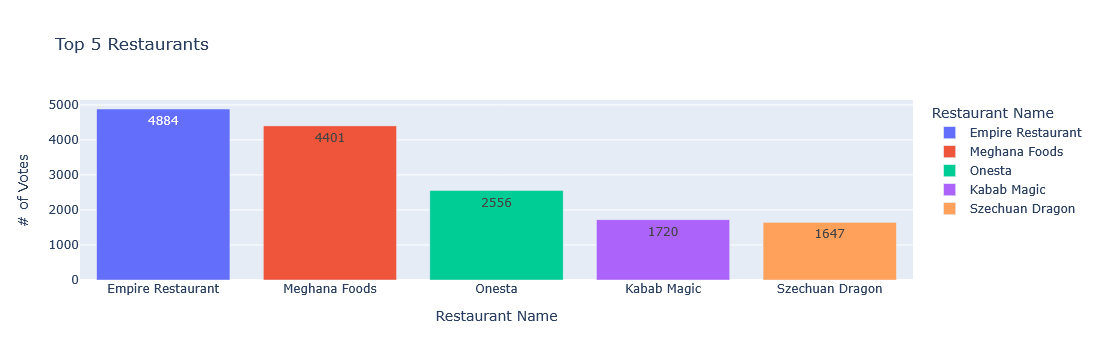

In [211]:
fig = px.bar(top_5, x='name', y='votes', color = 'name', title = "Top 5 Restaurants", text_auto = True,
             labels = {"name": "Restaurant Name", "votes": "# of Votes"})
fig.show()